<a href="https://colab.research.google.com/github/ddoed/Introduction-To-Data-Science/blob/main/W4L1_Pandas_and_Tables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PNUCSE 데이터과학입문  
## 4주차 실습자료  
### 교강사: 박영진, youngjinpark@pusan.ac.kr
---

## 실습 목표

- Pandas
- DataFrame
- Table Basics
- DataFrame w/ Real Data
  - NBA
  - Census

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pandas


In [ ]:
#p.7
#colab에서는 이미 pandas가 설치되어 있습니다.
!pip install pandas

# DataFrame

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#p.12
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [ ]:
#p.12 gen from list
df = pd.DataFrame(data = [1,2,3,4,5])
df

,0
0,1
1,2
2,3
3,4
4,5


In [ ]:
#p.12 gen from ndarray
df = pd.DataFrame(np.array([[1,2,3],[4,5,6]]))
df

,0,1,2
0,1,2,3
1,4,5,6


In [ ]:
#p.12 gen from series
series = pd.Series([10,20,30], index=['a','b','c'])
df = pd.DataFrame(series)
df

,0
a,10
b,20
c,30


In [ ]:
#p.12 gen from dict
dict_data = {'Name':['Minseok', 'Taekgwan', 'Jinyoung'], 'Score':[90,85,95]}
df = pd.DataFrame(dict_data)
df

,Name,Score
0,Minseok,90
1,Taekgwan,85
2,Jinyoung,95


In [ ]:
#p.12 gen from map
map_data = map(lambda x: x*2, [1,2,3,4])
df = pd.DataFrame(map_data, columns=['Values'])
df

,Values
0,2
1,4
2,6
3,8


In [ ]:
#p.12 dtype
df = pd.DataFrame(np.array([[1,2,3],[4,5,6]])) # ndarray
print(df)
df2 = pd.DataFrame(np.array([[1,2,3],[4,5,6]]), dtype=float) # ndarray
print(df2)

   0  1  2
0  1  2  3
1  4  5  6
     0    1    2
0  1.0  2.0  3.0
1  4.0  5.0  6.0


In [ ]:
#p.12 copy = False
original_data = np.array([[10, 20], [30, 40]])
df_no_copy = pd.DataFrame(original_data, copy=False)

df_no_copy.iloc[0, 0] = 999

print("Original Data:\n", original_data)
print("DataFrame:\n", df_no_copy)

Original Data:
 [[999  20]
 [ 30  40]]
DataFrame:
      0   1
0  999  20
1   30  40


In [ ]:
#p.12 copy = True
original_data = np.array([[10, 20], [30, 40]])
df_copy = pd.DataFrame(original_data, copy=True)

df_copy.iloc[0, 0] = 999

print("Original Data:\n", original_data)
print("DataFrame:\n", df_copy)

Original Data:
 [[10 20]
 [30 40]]
DataFrame:
      0   1
0  999  20
1   30  40


In [ ]:
#p.15
import datetime as dt
import numpy as np
import pandas as pd

In [ ]:
#p.15
np.random.seed(0) # set a seed for reproducibility
s = pd.Series(np.random.rand(5), index=["a", "b", "c", "d", "e"])
pd.DataFrame(s)

,0
a,0.548814
b,0.715189
c,0.602763
d,0.544883
e,0.423655


In [ ]:
#p.15
pd.Series(np.linspace(0, 10, num=5)).to_frame()

,0
0,0.0
1,2.5
2,5.0
3,7.5
4,10.0


In [ ]:
#p.16
import pandas as pd
data ={'apples':[3,2,0,1], 'oranges':[0,3,7,2]}
df=pd.DataFrame(data)
df

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


In [ ]:
#p.17
data ={'apples':[3,2,0,1], 'oranges':[0,3,7,2]}
df=pd.DataFrame(data,index=['Ace', 'Baloon', 'Coco', 'Data'])
df

,apples,oranges
Ace,3,0
Baloon,2,3
Coco,0,7
Data,1,2


In [ ]:
#p.18
np.random.seed(0) # set seed so result is reproducible
pd.DataFrame(
    {
        'random':np.random.rand(5),
        'text':['hot','warm','cool','cold',None],
        'truth':[np.random.choice([True, False]) for _ in range(5)]
    },
    index=pd.date_range(
        end=dt.date(2019,4,21),
        freq='1D',
        periods=5,
        name='date'
    )
)

,random,text,truth
date,,,
2019-04-17,0.548814,hot,False
2019-04-18,0.715189,warm,True
2019-04-19,0.602763,cool,True
2019-04-20,0.544883,cold,False
2019-04-21,0.423655,None,True


In [ ]:
#p.19
dict0 = {'col1': [1, 2, 3], 'col2': [4, 5, 6]}
pd.DataFrame.from_dict(data = dict0)

,col1,col2
0,1,4
1,2,5
2,3,6


In [ ]:
#p.20
pd.DataFrame([
  {'mag':5.2, 'place': 'California'},
  {'mag':1.2, 'place':'Alaska'},
  {'mag':0.2, 'place':'California'},
])

,mag,place
0,5.2,California
1,1.2,Alaska
2,0.2,California


In [ ]:
#p.20
list_of_tuples=[(n,n**2,n**3) for n in range(5)]
list_of_tuples

[(0, 0, 0), (1, 1, 1), (2, 4, 8), (3, 9, 27), (4, 16, 64)]

In [ ]:
pd.DataFrame(
    list_of_tuples,
    columns=['n','n_squared','n_cubed']
)

,n,n_squared,n_cubed
0,0,0,0
1,1,1,1
2,2,4,8
3,3,9,27
4,4,16,64


In [ ]:
#p.21
data= {'col_1':[3,2,1,0], 'col_2':['a','b','c','d']}
pd.DataFrame.from_dict(data)

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


In [ ]:
#p.21
data= {'row_1':[3,2,1,0], 'row_2':['a','b','c','d']}
pd.DataFrame.from_dict(data, orient='index')

,0,1,2,3
row_1,3,2,1,0
row_2,a,b,c,d


In [ ]:
#p.21
pd.DataFrame.from_dict(data, orient='index', columns=['A','B','C','D'])

,A,B,C,D
col_1,3,2,1,0
col_2,a,b,c,d


In [ ]:
#p.23
from google.colab import files
file_uploaded = files.upload()

df=pd.read_csv('dataset.csv')
df

Saving dataset.csv to dataset.csv


,Unnamed: 0,apples,oranges
0,Ace,3,0
1,Baloon,2,3
2,Coco,0,7
3,Data,1,2


In [ ]:
#p.24
df=pd.read_csv('dataset.csv',index_col=0)
df

,apples,oranges
Ace,3,0
Baloon,2,3
Coco,0,7
Data,1,2


In [ ]:
#p.25
df.to_csv('output.csv',index=False)
df.to_csv('output_indexed.csv',index=True)

# Important DataFrame operations


In [ ]:
#p.28 Load IMDB movie Dataset (file based) download link https://www.kaggle.com/datasets/PromptCloudHQ/imdb-data
file_uploaded=files.upload()
movies_df=pd.read_csv('IMDB-Movie-Data.csv',index_col='Title')
movies_df

Saving IMDB-Movie-Data.csv to IMDB-Movie-Data (2).csv


,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


In [ ]:
#p.28 Load IMDB movie Dataset (API based)
import os
import kagglehub
import zipfile

path = kagglehub.dataset_download("PromptCloudHQ/imdb-data")
file_path = os.path.join(path, os.listdir(path)[0])
print(file_path)
movies_df = pd.read_csv(file_path,index_col="Title")
movies_df

100%|██████████| 134k/134k [00:00<00:00, 522kB/s]

Extracting files...
/root/.cache/kagglehub/datasets/PromptCloudHQ/imdb-data/versions/1/IMDB-Movie-Data.csv


,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


In [ ]:
#p.29
movies_df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [ ]:
#p.29
movies_df.head(10)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
The Great Wall,6,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
Mindhorn,8,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
The Lost City of Z,9,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0


In [ ]:
#p.29
movies_df.tail(10)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Underworld: Rise of the Lycans,991,"Action,Adventure,Fantasy",An origins story centered on the centuries-old...,Patrick Tatopoulos,"Rhona Mitra, Michael Sheen, Bill Nighy, Steven...",2009,92,6.6,129708,45.80,44.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0
Take Me Home Tonight,993,"Comedy,Drama,Romance","Four years after graduation, an awkward high s...",Michael Dowse,"Topher Grace, Anna Faris, Dan Fogler, Teresa P...",2011,97,6.3,45419,6.92,NaN
Resident Evil: Afterlife,994,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
Project X,995,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [ ]:
#p.30
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


In [ ]:
#p.30
movies_df.shape

(1000, 11)

In [ ]:
#p.31 Handling duplicates
#오류 유도, pandas 2.0.0 버전부터 DataFrame.append()메소드 삭제
#공식문서 https://pandas.pydata.org/docs/dev/whatsnew/v2.0.0.html#deprecations
print(pd.__version__)
temp_df=movies_df.append([movies_df,movies_df])
temp_df.shape

2.2.2


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
#p.32
temp_df=pd.concat([movies_df,movies_df])
temp_df.shape

In [ ]:
#p.32
temp_df=temp_df.drop_duplicates()
temp_df.shape

In [ ]:
#p.32
temp_df=pd.concat([movies_df,movies_df])
temp_df.drop_duplicates(inplace=True)
temp_df.shape

In [ ]:
#p.33
movies_df.describe()

In [ ]:
#p.34
movies_df['Genre'].describe()

# Table Basics

In [5]:
#p.37
from datascience import *
import numpy as np
from google.colab import files
uploaded=files.upload()


KeyboardInterrupt: 

In [ ]:
Table?

In [11]:
#p.38
cones=Table.read_table('cones.csv')
cones

Flavor,Color,Price,Rating
strawberry,pink,3.55,1
chocolate,light brown,4.75,4
chocolate,dark brown,5.25,3
strawberry,pink,5.25,2
chocolate,dark brown,5.25,5
bubblegum,pink,4.75,1


In [7]:
#p.38
import pandas as pd
cones1=pd.read_csv('cones.csv')
cones1

,Flavor,Color,Price,Rating
0,strawberry,pink,3.55,1
1,chocolate,light brown,4.75,4
2,chocolate,dark brown,5.25,3
3,strawberry,pink,5.25,2
4,chocolate,dark brown,5.25,5
5,bubblegum,pink,4.75,1


In [8]:
#p.39
cones1=pd.read_csv('cones.csv',index_col=0)
cones1

,Color,Price,Rating
Flavor,,,
strawberry,pink,3.55,1
chocolate,light brown,4.75,4
chocolate,dark brown,5.25,3
strawberry,pink,5.25,2
chocolate,dark brown,5.25,5
bubblegum,pink,4.75,1


In [9]:
#p.39
#Define cones' attributes
conesAttributes=["Flavor","Color","Price"]

# Define cones' data, must be same sequence as attributes
conesData = [["strawberry", "pink", 3.55],
	["chocolate", "light brown", 4.75],
	["chocolate", "dark brown", 5.25],
	["strawberry", "pink", 5.25],
	["chocolate", "dark brown", 5.25],
	["bubblegem", "pink", 4.75]]

# Define cones
cones3 = pd.DataFrame(data=conesData, columns=conesAttributes)
cones3

,Flavor,Color,Price
0,strawberry,pink,3.55
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25
3,strawberry,pink,5.25
4,chocolate,dark brown,5.25
5,bubblegem,pink,4.75


In [12]:
#p.40
t=cones
t.select('Flavor')


Flavor
strawberry
chocolate
chocolate
strawberry
chocolate
bubblegum


In [13]:
#p.40
t.drop('Flavor')

Color,Price,Rating
pink,3.55,1
light brown,4.75,4
dark brown,5.25,3
pink,5.25,2
dark brown,5.25,5
pink,4.75,1


In [14]:
#p.40
t.sort('Rating')

Flavor,Color,Price,Rating
strawberry,pink,3.55,1
bubblegum,pink,4.75,1
strawberry,pink,5.25,2
chocolate,dark brown,5.25,3
chocolate,light brown,4.75,4
chocolate,dark brown,5.25,5


In [15]:
#p.40
t.where('Price',lambda p: p<=4)

Flavor,Color,Price,Rating
strawberry,pink,3.55,1


In [16]:
#p.41
no_colors=cones.drop('Color')
no_colors


Flavor,Price,Rating
strawberry,3.55,1
chocolate,4.75,4
chocolate,5.25,3
strawberry,5.25,2
chocolate,5.25,5
bubblegum,4.75,1


In [17]:
#p.41
no_colors1=cones1.drop(columns='Color')
no_colors1

,Price,Rating
Flavor,,
strawberry,3.55,1
chocolate,4.75,4
chocolate,5.25,3
strawberry,5.25,2
chocolate,5.25,5
bubblegum,4.75,1


In [18]:
#p.42
cones.drop('Color')

Flavor,Price,Rating
strawberry,3.55,1
chocolate,4.75,4
chocolate,5.25,3
strawberry,5.25,2
chocolate,5.25,5
bubblegum,4.75,1


In [19]:
#p.42
cones1.drop(columns='Color')

,Price,Rating
Flavor,,
strawberry,3.55,1
chocolate,4.75,4
chocolate,5.25,3
strawberry,5.25,2
chocolate,5.25,5
bubblegum,4.75,1


In [20]:
#p.42
#delete cols, axis =1 means delete cols
cones1.drop(labels = 'Price', axis=1)

,Color,Rating
Flavor,,
strawberry,pink,1
chocolate,light brown,4
chocolate,dark brown,3
strawberry,pink,2
chocolate,dark brown,5
bubblegum,pink,1


In [21]:
#p.42
#delete rows, axis =0 means delete rows
cones1=pd.read_csv('cones.csv')
cones1.drop(labels = 3, axis=0)

,Flavor,Color,Price,Rating
0,strawberry,pink,3.55,1
1,chocolate,light brown,4.75,4
2,chocolate,dark brown,5.25,3
4,chocolate,dark brown,5.25,5
5,bubblegum,pink,4.75,1


In [22]:
#p.43
cones.sort('Price')

Flavor,Color,Price,Rating
strawberry,pink,3.55,1
chocolate,light brown,4.75,4
bubblegum,pink,4.75,1
chocolate,dark brown,5.25,3
strawberry,pink,5.25,2
chocolate,dark brown,5.25,5


In [23]:
#p.43
cones.sort('Price',descending=True)

Flavor,Color,Price,Rating
chocolate,dark brown,5.25,3
strawberry,pink,5.25,2
chocolate,dark brown,5.25,5
chocolate,light brown,4.75,4
bubblegum,pink,4.75,1
strawberry,pink,3.55,1


In [24]:
#p.43
cones1.sort_values(by=['Price'])

,Flavor,Color,Price,Rating
0,strawberry,pink,3.55,1
1,chocolate,light brown,4.75,4
5,bubblegum,pink,4.75,1
2,chocolate,dark brown,5.25,3
3,strawberry,pink,5.25,2
4,chocolate,dark brown,5.25,5


In [25]:
#p.43
cones1.sort_values(by=['Price'],ascending=False)

,Flavor,Color,Price,Rating
3,strawberry,pink,5.25,2
2,chocolate,dark brown,5.25,3
4,chocolate,dark brown,5.25,5
1,chocolate,light brown,4.75,4
5,bubblegum,pink,4.75,1
0,strawberry,pink,3.55,1


In [26]:
#p.44
cones.where('Flavor','chocolate')

Flavor,Color,Price,Rating
chocolate,light brown,4.75,4
chocolate,dark brown,5.25,3
chocolate,dark brown,5.25,5


In [27]:
#p.44-45
# Making boolean series for a cones
filter = cones1['Flavor'] == "chocolate"
filter

,Flavor
0,False
1,True
2,True
3,False
4,True
5,False


In [28]:
#p.44-45
# Pass filter to cones
cones1.loc[filter]

,Flavor,Color,Price,Rating
1,chocolate,light brown,4.75,4
2,chocolate,dark brown,5.25,3
4,chocolate,dark brown,5.25,5


In [29]:
#p.46
#weird action
cones1.where(cones1['Flavor'] == 'chocolate')

,Flavor,Color,Price,Rating
0,NaN,NaN,NaN,NaN
1,chocolate,light brown,4.75,4.0
2,chocolate,dark brown,5.25,3.0
3,NaN,NaN,NaN,NaN
4,chocolate,dark brown,5.25,5.0
5,NaN,NaN,NaN,NaN


In [30]:
#p.47
print(cones.column('Flavor'))
print(cones.column(0))

['strawberry' 'chocolate' 'chocolate' 'strawberry' 'chocolate' 'bubblegum']
['strawberry' 'chocolate' 'chocolate' 'strawberry' 'chocolate' 'bubblegum']


In [31]:
#p.47
print(cones.column('Flavor').item(0))

s0 = cones.column('Flavor')
s1 = cones.column('Price')

#print(np.mean(s0)) # error!
print(np.mean(s1))

strawberry
4.8


# Pandas Examples - NBA dataset

In [32]:
import numpy as np
import pandas as pd

In [33]:
from google.colab import files
file_uploaded = files.upload()

KeyboardInterrupt: 

In [34]:
nba_salaries = pd.read_csv('nba_salaries.csv')
nba_salaries

,RANK,PLAYER,POSITION,TEAM,SALARY,SEASON
0,1,Shaquille O'Neal,C,Los Angeles Lakers,17142000,2000
1,2,Kevin Garnett,PF,Minnesota Timberwolves,16806000,2000
2,3,Alonzo Mourning,C,Miami Heat,15004000,2000
3,4,Juwan Howard,PF,Washington Wizards,15000000,2000
4,5,Scottie Pippen,SF,Portland Trail Blazers,14795000,2000
...,...,...,...,...,...,...
9451,524,Jimmer Fredette,G,Phoenix Suns,208509,2020
9452,525,Jontay Porter,PF,Memphis Grizzlies,197933,2020
9453,526,Anthony Tolliver,PF,Memphis Grizzlies,183115,2020
9454,527,Tyler Johnson,SG,Phoenix Suns,183115,2020


<h2>Data sort</h2>

In [35]:
# Show first 3 rows
nba_salaries.iloc[:3]

,RANK,PLAYER,POSITION,TEAM,SALARY,SEASON
0,1,Shaquille O'Neal,C,Los Angeles Lakers,17142000,2000
1,2,Kevin Garnett,PF,Minnesota Timberwolves,16806000,2000
2,3,Alonzo Mourning,C,Miami Heat,15004000,2000


In [36]:
# Sort nba_salaries based on 'PLAYER' then show first 5 rows
nba_salaries.sort_values('PLAYER').iloc[:5]

,RANK,PLAYER,POSITION,TEAM,SALARY,SEASON
336,180,A.C. Green,F,Miami Heat,2250000,2001
511,355,A.J. Guyton,G,Chicago Bulls,316000,2001
914,384,A.J. Guyton,G,Chicago Bulls,465000,2002
4334,444,A.J. Price,PG,Indiana Pacers,762195,2011
6706,522,A.J. Price,PG,Phoenix Suns,53838,2015


In [37]:
# Sort nba_salaries by 'SALARY'
nba = nba_salaries.sort_values('SALARY')
nba

,RANK,PLAYER,POSITION,TEAM,SALARY,SEASON
3889,481,Tony Gaffney,SF,Memphis Grizzlies,2692,2010
3890,482,Oliver Lafayette,G,Boston Celtics,2692,2010
2923,491,Billy Thomas,SG,New Jersey Nets,4533,2008
2922,490,Linton Johnson,PF,Toronto Raptors,4533,2008
8423,597,Amile Jefferson,PF,Orlando Magic,4608,2018
...,...,...,...,...,...,...
8931,4,John Wall,PG,Washington Wizards,38199000,2020
8933,6,James Harden,SG,Houston Rockets,38199000,2020
8929,2,Chris Paul,PG,Oklahoma City Thunder,38506482,2020
8930,3,Russell Westbrook,PG,Houston Rockets,38506482,2020


In [38]:
# Sort nba first by 'TEAM', then by 'SALARY'
nba.sort_values(by=['TEAM', 'SALARY'], ascending=False)

,RANK,PLAYER,POSITION,TEAM,SALARY,SEASON
5590,539,Magnum Rolle,NaN,null Unknown,788872,2013
4924,492,Magnum Rolle,NaN,null Unknown,788872,2012
4916,484,Da'Sean Butler,NaN,null Unknown,788872,2012
5577,526,Da'Sean Butler,NaN,null Unknown,788872,2013
4937,505,Kenny Hasbrouck,NaN,null Unknown,762195,2012
...,...,...,...,...,...,...
7791,559,Lamar Patterson,SG,Atlanta Hawks,246956,2017
8402,576,Lamar Patterson,SG,Atlanta Hawks,246956,2018
6167,417,Mike Muscala,PF,Atlanta Hawks,138404,2014
8914,490,Isaac Humphries,C,Atlanta Hawks,47371,2019


<h2>Selecting Rows</h2>

In [39]:
# Take the top five high salary players
nba.sort_values('SALARY', ascending=False).iloc[:5]

,RANK,PLAYER,POSITION,TEAM,SALARY,SEASON
8928,1,Stephen Curry,PG,Golden State Warriors,40231758,2020
8930,3,Russell Westbrook,PG,Houston Rockets,38506482,2020
8929,2,Chris Paul,PG,Oklahoma City Thunder,38506482,2020
8931,4,John Wall,PG,Washington Wizards,38199000,2020
8933,6,James Harden,SG,Houston Rockets,38199000,2020


In [40]:
# Filter the rows where 'SALARY' >= 10000000
nba[nba['SALARY']>10000000]

,RANK,PLAYER,POSITION,TEAM,SALARY,SEASON
7943,117,Jon Leuer,F,Detroit Pistons,10002681,2018
8545,121,Jon Leuer,F,Detroit Pistons,10002681,2019
984,38,Nick Van Exel,PG,Dallas Mavericks,10003000,2003
565,35,Brian Grant,PF,Miami Heat,10009000,2002
3467,59,Al Harrington,PF,New York Knicks,10026875,2010
...,...,...,...,...,...,...
8931,4,John Wall,PG,Washington Wizards,38199000,2020
8933,6,James Harden,SG,Houston Rockets,38199000,2020
8929,2,Chris Paul,PG,Oklahoma City Thunder,38506482,2020
8930,3,Russell Westbrook,PG,Houston Rockets,38506482,2020


In [41]:
# Filter the rows where 'SALARY' >= 10000000, then sort by 'SALARY', ascending=False
nba[nba['SALARY']>10000000].sort_values('SALARY', ascending=False)

,RANK,PLAYER,POSITION,TEAM,SALARY,SEASON
8928,1,Stephen Curry,PG,Golden State Warriors,40231758,2020
8930,3,Russell Westbrook,PG,Houston Rockets,38506482,2020
8929,2,Chris Paul,PG,Oklahoma City Thunder,38506482,2020
8932,5,Kevin Durant,SF,Brooklyn Nets,38199000,2020
8931,4,John Wall,PG,Washington Wizards,38199000,2020
...,...,...,...,...,...,...
3467,59,Al Harrington,PF,New York Knicks,10026875,2010
565,35,Brian Grant,PF,Miami Heat,10009000,2002
984,38,Nick Van Exel,PG,Dallas Mavericks,10003000,2003
8545,121,Jon Leuer,F,Detroit Pistons,10002681,2019


In [42]:
# See output
nba['PLAYER']=='Stephen Curry'

,PLAYER
3889,False
3890,False
2923,False
2922,False
8423,False
...,...
8931,False
8933,False
8929,False
8930,False


In [43]:
# Filter the rows where 'PLARYER' == 'Stephen Curry'
nba[nba['PLAYER']=='Stephen Curry']

,RANK,PLAYER,POSITION,TEAM,SALARY,SEASON
3635,227,Stephen Curry,PG,Golden State Warriors,2710560,2010
4113,223,Stephen Curry,PG,Golden State Warriors,2913840,2011
4645,213,Stephen Curry,PG,Golden State Warriors,3117120,2012
5238,187,Stephen Curry,PG,Golden State Warriors,3958742,2013
5807,57,Stephen Curry,PG,Golden State Warriors,9887642,2014
6237,53,Stephen Curry,PG,Golden State Warriors,10629213,2015
6772,61,Stephen Curry,PG,Golden State Warriors,11370786,2016
7314,82,Stephen Curry,PG,Golden State Warriors,12112359,2017
7827,1,Stephen Curry,PG,Golden State Warriors,37457154,2018
8425,1,Stephen Curry,PG,Golden State Warriors,37457154,2019


In [44]:
# Get a table of all the Warriors
nba[nba['TEAM']=='Golden State Warriors']

,RANK,PLAYER,POSITION,TEAM,SALARY,SEASON
3886,478,Coby Karl,PG,Golden State Warriors,17328,2010
526,370,Chris Garner,G,Golden State Warriors,32000,2001
5038,606,Mikki Moore,C,Golden State Warriors,75793,2012
5732,681,Mikki Moore,C,Golden State Warriors,75793,2013
3869,461,Reggie Williams,SF,Golden State Warriors,118435,2010
...,...,...,...,...,...,...
8435,11,Kevin Durant,SF,Golden State Warriors,30000000,2019
8940,13,Klay Thompson,SG,Golden State Warriors,32742000,2020
7827,1,Stephen Curry,PG,Golden State Warriors,37457154,2018
8425,1,Stephen Curry,PG,Golden State Warriors,37457154,2019


In [45]:
# Fuzzy search for records in 'TEAM' columns containing 'Warriors'
nba[nba['TEAM'].str.contains('Warriors', regex=False)]

,RANK,PLAYER,POSITION,TEAM,SALARY,SEASON
3886,478,Coby Karl,PG,Golden State Warriors,17328,2010
526,370,Chris Garner,G,Golden State Warriors,32000,2001
5038,606,Mikki Moore,C,Golden State Warriors,75793,2012
5732,681,Mikki Moore,C,Golden State Warriors,75793,2013
3869,461,Reggie Williams,SF,Golden State Warriors,118435,2010
...,...,...,...,...,...,...
8435,11,Kevin Durant,SF,Golden State Warriors,30000000,2019
8940,13,Klay Thompson,SG,Golden State Warriors,32742000,2020
7827,1,Stephen Curry,PG,Golden State Warriors,37457154,2018
8425,1,Stephen Curry,PG,Golden State Warriors,37457154,2019


In [46]:
# Filter 'POSITION' == 'PG' & 'SALARY' > 1500000
nba[(nba['POSITION']=='PG') & (nba['SALARY']>1500000)]

,RANK,PLAYER,POSITION,TEAM,SALARY,SEASON
7011,300,Delon Wright,PG,Toronto Raptors,1509360,2016
8807,383,Derrick Rose,PG,Minnesota Timberwolves,1512601,2019
8802,378,Isaiah Thomas,PG,Denver Nuggets,1512601,2019
4741,309,Eric Maynor,PG,Oklahoma City Thunder,1516680,2012
4740,308,Avery Bradley,PG,Boston Celtics,1524480,2012
...,...,...,...,...,...,...
8425,1,Stephen Curry,PG,Golden State Warriors,37457154,2019
8931,4,John Wall,PG,Washington Wizards,38199000,2020
8929,2,Chris Paul,PG,Oklahoma City Thunder,38506482,2020
8930,3,Russell Westbrook,PG,Houston Rockets,38506482,2020


# Census Data Analysis

In [47]:
import numpy as np
import pandas as pd

In [48]:
# As of Mar 2023, this census file is online here:
data = 'http://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.csv'

full_census_table = pd.read_csv(data)
full_census_table


,SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,0,3944153,3944160,3951430,3963092,3926570,3931258,3954787,3983981,3954773,3893990,3815343,3783052
1,0,1,3978070,3978090,3957730,3966225,3977549,3942698,3948891,3973133,4002903,3972711,3908830,3829599
2,0,2,4096929,4096939,4090621,3970654,3978925,3991740,3958711,3966321,3991349,4020045,3987032,3922044
3,0,3,4119040,4119051,4111688,4101644,3981531,3991017,4005928,3974351,3982984,4006946,4033038,3998665
4,0,4,4063170,4063186,4077346,4121488,4111490,3992502,4004032,4020292,3989750,3997280,4018719,4043323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2,97,53582,53605,54165,57123,59221,60670,62407,68608,69709,76276,82100,84358
302,2,98,36641,36675,37567,40078,42561,43866,45887,46611,52122,52978,57593,62607
303,2,99,26193,26214,26098,26995,29076,30672,32245,33560,34278,38489,39576,42528
304,2,100,44202,44246,45080,47427,50040,52817,57108,60309,64381,67113,72153,76850


<h3>Analyzing Census Data for Age</h3>

In [49]:
# Select relevant columns
partial_census_table = full_census_table[['SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019']]
partial_census_table

,SEX,AGE,POPESTIMATE2014,POPESTIMATE2019
0,0,0,3954787,3783052
1,0,1,3948891,3829599
2,0,2,3958711,3922044
3,0,3,4005928,3998665
4,0,4,4004032,4043323
...,...,...,...,...
301,2,97,62407,84358
302,2,98,45887,62607
303,2,99,32245,42528
304,2,100,57108,76850


In [50]:
# Simplify the columns name
us_pop = partial_census_table.rename(columns= {'POPESTIMATE2014': '2014', 'POPESTIMATE2019': '2019'})
us_pop

,SEX,AGE,2014,2019
0,0,0,3954787,3783052
1,0,1,3948891,3829599
2,0,2,3958711,3922044
3,0,3,4005928,3998665
4,0,4,4004032,4043323
...,...,...,...,...
301,2,97,62407,84358
302,2,98,45887,62607
303,2,99,32245,42528
304,2,100,57108,76850


In [52]:
# Filter the records between 97 and 100, regardless sex
filter = (us_pop['SEX']==0) & (97<=us_pop['AGE']) & (us_pop['AGE']<=100)
us_pop_by_high_ages = us_pop[filter]
us_pop_by_high_ages.drop(columns='SEX')

,AGE,2014,2019
97,97,82948,116969
98,98,59546,86150
99,99,41277,57124
100,100,70685,100322


In [53]:
filter = us_pop['SEX']==0
us_pop_ages = us_pop[filter]
us_pop_ages.drop(columns='SEX')

,AGE,2014,2019
0,0,3954787,3783052
1,1,3948891,3829599
2,2,3958711,3922044
3,3,4005928,3998665
4,4,4004032,4043323
...,...,...,...
97,97,82948,116969
98,98,59546,86150
99,99,41277,57124
100,100,70685,100322


In [54]:
change=us_pop_ages['2019'] - us_pop_ages['2014']
change

,0
0,-171735
1,-119292
2,-36667
3,-7263
4,39291
...,...
97,34021
98,26604
99,15847
100,29637


In [55]:
# Make a new df census from us_pop, then add two new columns
us_pop_change = us_pop_ages.drop(columns='SEX').copy()
us_pop_change['Change']=change
us_pop_change['Percent Change']=change/us_pop_change['2014']
us_pop_change.style.format({'Percent Change': '{:.2%}'})


,AGE,2014,2019,Change,Percent Change
0,0,3954787,3783052,-171735,-4.34%
1,1,3948891,3829599,-119292,-3.02%
2,2,3958711,3922044,-36667,-0.93%
3,3,4005928,3998665,-7263,-0.18%
4,4,4004032,4043323,39291,0.98%
5,5,4004576,4028281,23705,0.59%
6,6,4133372,4017227,-116145,-2.81%
7,7,4152666,4022319,-130347,-3.14%
8,8,4118349,4066194,-52155,-1.27%
9,9,4106068,4061874,-44194,-1.08%


In [ ]:
overall_change=us_pop_change[us_pop_change['AGE']==999]
overall_change.style.format({'Percent Change': '{:.2%}'})

In [56]:
# Sort census by Change, ascending=False
us_pop_change.sort_values(by='Change', ascending=False).style.format({'Percent Change': '{:.2%}'})

,AGE,2014,2019,Change,Percent Change
101,999,318301008,328239523,9938515,3.12%
72,72,2191642,3191048,999406,45.60%
68,68,2567511,3345475,777964,30.30%
69,69,2530460,3252423,721963,28.53%
70,70,2461426,3136704,675278,27.43%
71,71,2516392,3083083,566691,22.52%
76,76,1692960,2222392,529432,31.27%
62,62,3677408,4156645,479237,13.03%
28,28,4345247,4818725,473478,10.90%
64,64,3481789,3950578,468789,13.46%


<h3>Analyzing Census Data for Gender</h3>

In [57]:
# As of Mar 2023, this census file is online here:
data = 'http://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.csv'

full_census_table= pd.read_csv(data)
full_census_table

,SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,0,3944153,3944160,3951430,3963092,3926570,3931258,3954787,3983981,3954773,3893990,3815343,3783052
1,0,1,3978070,3978090,3957730,3966225,3977549,3942698,3948891,3973133,4002903,3972711,3908830,3829599
2,0,2,4096929,4096939,4090621,3970654,3978925,3991740,3958711,3966321,3991349,4020045,3987032,3922044
3,0,3,4119040,4119051,4111688,4101644,3981531,3991017,4005928,3974351,3982984,4006946,4033038,3998665
4,0,4,4063170,4063186,4077346,4121488,4111490,3992502,4004032,4020292,3989750,3997280,4018719,4043323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2,97,53582,53605,54165,57123,59221,60670,62407,68608,69709,76276,82100,84358
302,2,98,36641,36675,37567,40078,42561,43866,45887,46611,52122,52978,57593,62607
303,2,99,26193,26214,26098,26995,29076,30672,32245,33560,34278,38489,39576,42528
304,2,100,44202,44246,45080,47427,50040,52817,57108,60309,64381,67113,72153,76850


In [58]:
# Select relevant columns
partial_census_table = full_census_table[['SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019']]
partial_census_table

,SEX,AGE,POPESTIMATE2014,POPESTIMATE2019
0,0,0,3954787,3783052
1,0,1,3948891,3829599
2,0,2,3958711,3922044
3,0,3,4005928,3998665
4,0,4,4004032,4043323
...,...,...,...,...
301,2,97,62407,84358
302,2,98,45887,62607
303,2,99,32245,42528
304,2,100,57108,76850


In [59]:
# Simplify the columns name
us_pop = partial_census_table.rename(columns=	{'POPESTIMATE2014': '2014', 'POPESTIMATE2019': '2019'})
us_pop

,SEX,AGE,2014,2019
0,0,0,3954787,3783052
1,0,1,3948891,3829599
2,0,2,3958711,3922044
3,0,3,4005928,3998665
4,0,4,4004032,4043323
...,...,...,...,...
301,2,97,62407,84358
302,2,98,45887,62607
303,2,99,32245,42528
304,2,100,57108,76850


In [60]:
# Drop column '2010' then filter 'AGE'==999
us_pop_2019 = us_pop.drop(columns='2014')
all_ages = us_pop_2019[us_pop_2019['AGE']==999]
all_ages

,SEX,AGE,2019
101,0,999,328239523
203,1,999,161657324
305,2,999,166582199


In [61]:
# Add a column Proportion
pop_2019 = all_ages[all_ages['SEX']==0]['2019'].item()
all_ages.loc[:, 'Proportion'] = all_ages['2019']/pop_2019
all_ages.style.format({'Proportion':'{:.2%}'})

<ipython-input-61-2f8a8af35228>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_ages.loc[:, 'Proportion'] = all_ages['2019']/pop_2019


,SEX,AGE,2019,Proportion
101,0,999,328239523,100.00%
203,1,999,161657324,49.25%
305,2,999,166582199,50.75%


In [62]:
# Filter AGE == 0
infants = us_pop_2019[us_pop_2019.AGE==0]
infants

,SEX,AGE,2019
0,0,0,3783052
102,1,0,1935117
204,2,0,1847935


In [63]:
# Add a column Proportion
infants.loc[:,'Proportion'] = infants['2019']/([infants.iloc[0, 2]]*3)
infants.style.format({'Proportion':'{:.2%}'})

<ipython-input-63-6c8b1c014b1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infants.loc[:,'Proportion'] = infants['2019']/([infants.iloc[0, 2]]*3)


,SEX,AGE,2019,Proportion
0,0,0,3783052,100.00%
102,1,0,1935117,51.15%
204,2,0,1847935,48.85%


In [64]:
# Get all females data except total age 999
females = us_pop_2019[(us_pop_2019.SEX==2) & (us_pop_2019.AGE!=999)]
females

,SEX,AGE,2019
204,2,0,1847935
205,2,1,1871014
206,2,2,1916500
207,2,3,1955655
208,2,4,1976372
...,...,...,...
300,2,96,111417
301,2,97,84358
302,2,98,62607
303,2,99,42528


In [65]:
# Get all males data except total age 999
males = us_pop_2019[(us_pop_2019.SEX==1) & (us_pop_2019.AGE!=999)]
males

,SEX,AGE,2019
102,1,0,1935117
103,1,1,1958585
104,1,2,2005544
105,1,3,2043010
106,1,4,2066951
...,...,...,...
198,1,96,46046
199,1,97,32611
200,1,98,23543
201,1,99,14596


In [66]:
# Make a new df ratios
ratios = pd.DataFrame({'AGE': females.AGE, '2019 F:M RATIO': np.array(females['2019'])/np.array(males['2019'])})
ratios.style.format({'2019 F:M RATIO':'{:.2%}'})

,AGE,2019 F:M RATIO
204,0,95.49%
205,1,95.53%
206,2,95.56%
207,3,95.72%
208,4,95.62%
209,5,95.43%
210,6,95.68%
211,7,95.66%
212,8,95.52%
213,9,95.93%


In [67]:
# Filter the ratios more than 75
ratios[ratios.AGE>75]
# or ratios[ratios['AGE']>75]

,AGE,2019 F:M RATIO
280,76,1.214222
281,77,1.235576
282,78,1.263727
283,79,1.281286
284,80,1.292093
285,81,1.327453
286,82,1.361014
287,83,1.397488
288,84,1.446027
289,85,1.485885


<Axes: xlabel='AGE'>

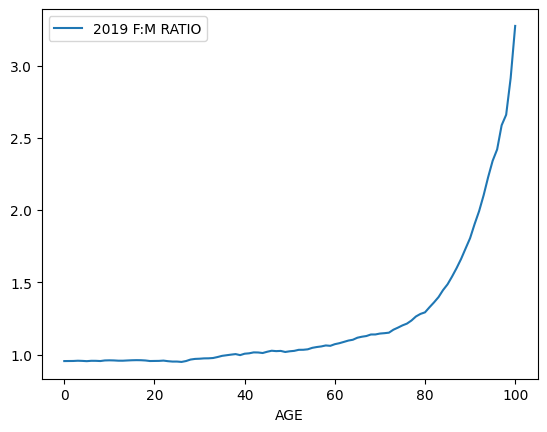

In [68]:
%matplotlib inline
ratios.plot('AGE')

In [69]:
import plotly.express as px
fig = px.line(ratios, x='AGE', y='2019 F:M RATIO')
fig.show()